Numpy array: core functionality is the ndarray class- an n-dimensional array where all elements must be of same type

In [89]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


SciPi: collection of functions for scientific computing
- can provide sparse matrices, a 2D array with mostly zeros

In [90]:
from scipy import sparse

# Create a 2D NumPy array with a diagonal of ones, and zeros everywhere else
eye = np.eye(4)
print("NumPy array:\n", eye)

NumPy array:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


If you have large datasets, it makes sense to only display the nonzero values instead of the whole matrix. Two ways to do this:


In [91]:
# Convert the NumPy array to a SciPy sparse matrix in CSR format
# Only the nonzero entries are stored
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy sparse CSR matrix:\n", sparse_matrix)


SciPy sparse CSR matrix:
 <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4 stored elements and shape (4, 4)>
  Coords	Values
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [92]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO representation:\n", eye_coo)

COO representation:
 <COOrdinate sparse matrix of dtype 'float64'
	with 4 stored elements and shape (4, 4)>
  Coords	Values
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


Matplot lib: great for making visualizations. When working inside the Jupyter Notebook, you can show figures directly in the browser by using the %matplotlib notebook and %matplotlib inline commands. We recommend using %matplotlib notebook, which provides an interactive environment.

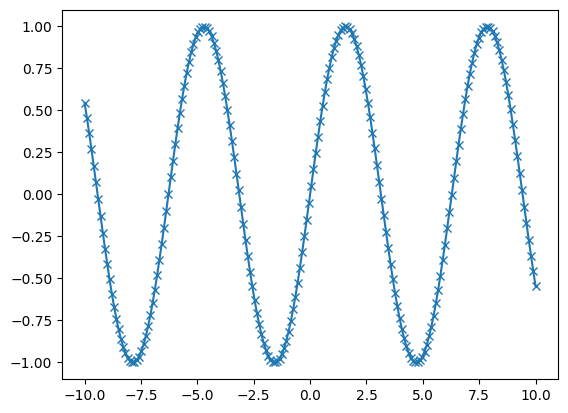

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt

# Generate a sequence of numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10, 10, 200)
# Create a second array using sine
y = np.sin(x)
# The plot function makes a line chart of one array against another
plt.plot(x, y, marker="x")

Pandas: python library built around a datastructure called DataFrame- a table, similar to Excel spreadsheet. Useful because each column can be different types, unlike with NumPy.

In [94]:
import pandas as pd

# create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
# IPython.display allows "pretty printing" of dataframes
# in the Jupyter notebook
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [95]:
# Select all rows that have an age column greater than 30
display(data_pandas[data_pandas.Age > 30])

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


First example: Let's classify an iris into one of three species!
- First, we load the iris dataset (load_iris is a Bunch object, which contains keys and values)

In [96]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [97]:
print("Keys of iris_dataset:\n", iris_dataset.keys())


Keys of iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


DESCR is a short description of the dataset, here are the first 193 characters:

In [98]:
print(iris_dataset['DESCR'][:193]+ "\n...")


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 
...


Target names is an array of strings that contains the species:

In [99]:
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


feature_names is a list of strings that describe each feature:

In [100]:
print(iris_dataset['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Data is contained in target and data fields. Data has measurement of sepal length, width, petal length, and petal width in a NumPy array.

In [101]:
print("Type of data:", type(iris_dataset['data']))


Type of data: <class 'numpy.ndarray'>


Shape of data: 150 rows (samples) for 150 flowers times 4 columns (features) for the four measurements per flower

In [102]:
print("Shape of data:", iris_dataset['data'].shape)


Shape of data: (150, 4)


In [103]:
print("First five rows of data:\n", iris_dataset['data'][:5])


First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


Target array contains species of each of flowers that were measured. It's a one dimensional NumPy array with one entry per flower. The types are encoded as integers from 0 to 2. The meanings of each number is given by target_names array.

In [104]:
print("Type of target:", type(iris_dataset['target']))


Type of target: <class 'numpy.ndarray'>


In [105]:
print("Shape of target:", iris_dataset['target'].shape)


Shape of target: (150,)


In [106]:
print("Target:\n", iris_dataset['target'])


Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Training data should be around 75%. This is used to train our model. Test data should be the last 25%. This is used to see if our model performs correctly. A useful function in scikit-learn is called train_test_split function. It splits 75% into a training set, and 25% for the test set.
It is pseudo-random, to get the same result every time you run it, set your random_state (here it is 0). You get four outputs: X_train, X_test, y_train, and y_test, which are all NumPy arrays.

In scikit-learn, data is X (array) while labels are y (vector)

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)



In [108]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [109]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)


It is useful to INSPECT your data, and a good way to do that is to VISUALIZE it. For example, we can use a scatterplot that puts one feature on x axis, and one on y axis, and make scatterplots of all the possible pairs.
To do this, convert NumPy array into pandas DataFrame. pandas has a function to create pair plots called scatter_matrix. The diagonal of this matrix is filled with histograms of each feature:

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

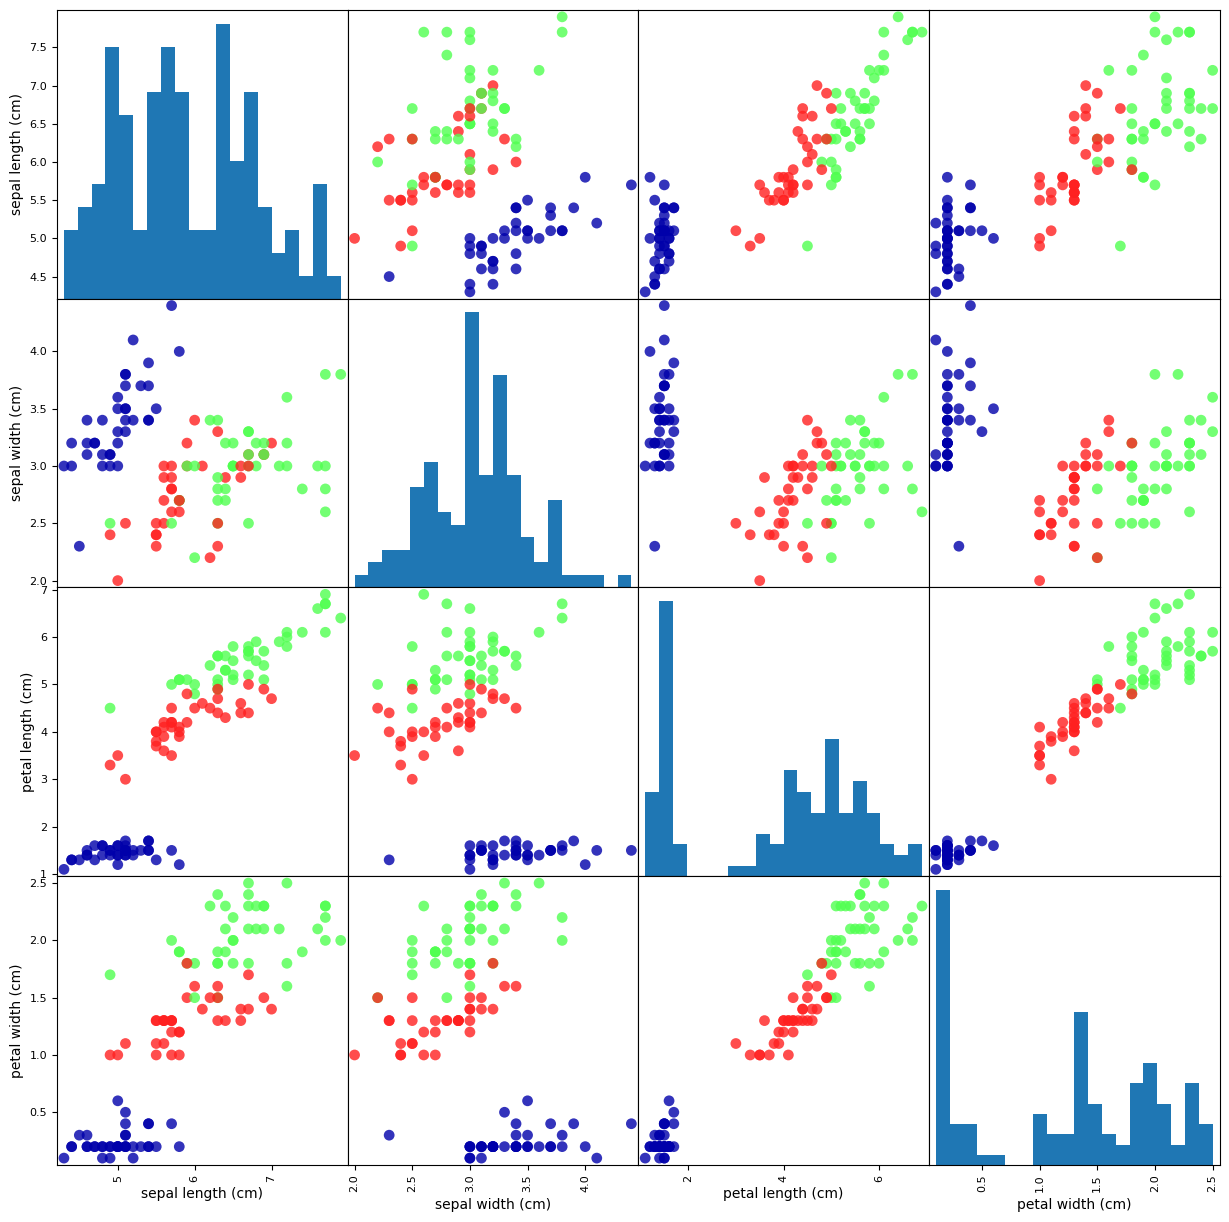

In [110]:
import mglearn
import pandas as pd
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

k-nearest neighbor classifier: to make prediction for new data point, algorithm finds k points in training set closest to the new point, and assigns the value based on those k nearest points.

Machine learning models in scikit-learn are implemented in Estimator classes. Specifically, the k-nearest neighbors classification algorithm is in the KNeighborsClassifier class in neighbors module. To use the model, we must instantiate the class into an object, where we set any parameters of the model. Most important is the number of neighbors (k). In example, we set it to 1.

In [111]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

The knn object encapsulates the algorithm that will be used to build the model from the training data, as well the algorithm to make predictions on new data points. It will also hold the information that the algorithm has extracted from the training data. In the case of KNeighborsClassifier, it will just store the training set.

To build the model on the training set, we call the fit method of the knn object, which takes as arguments the NumPy array X_train containing the training data and the NumPy array y_train of the corresponding training labels:

In [112]:
knn.fit(X_train, y_train)


,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",1
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


This returns the knn object, so we get a string representation of our classifier, which shows the parameters used to create the model. Don't worry about any of the parameters, except for n_neighbors.

Now let's make predictions. If we have a new iris, we can put its data into a NumPy array.

In [113]:
X_new = np.array([[5, 2.9, 1, 0.2]])


To make a prediction, we call the predict method of the knn object:



In [114]:
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])

Prediction: [0]
Predicted target name: ['setosa']


Let's test how accurate these predictions are, by using our test set. We can measure the ACCURACY of the model, aka what fraction it predicts correctly.

In [115]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


Two methods to compute accuracy:

In [116]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))


Test set score: 0.97


In [117]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))


Test set score: 0.97


Yay! Our model is 97% accurate.

Code summary:

In [118]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


Two-class classification dataset example:

X.shape: (26, 2)


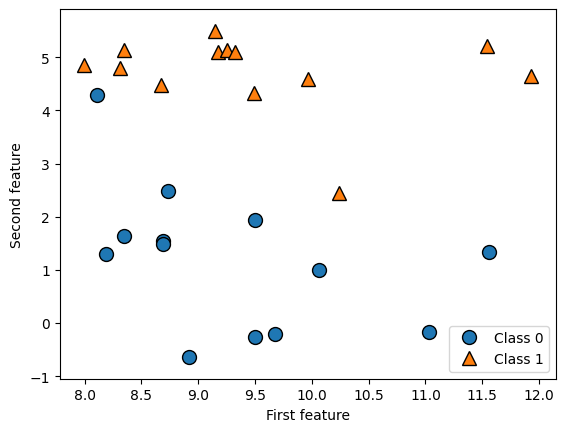

In [119]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

Regression dataset example (it has a single input feature, and a continous target variable). Each point represents one data point:

Text(0, 0.5, 'Target')

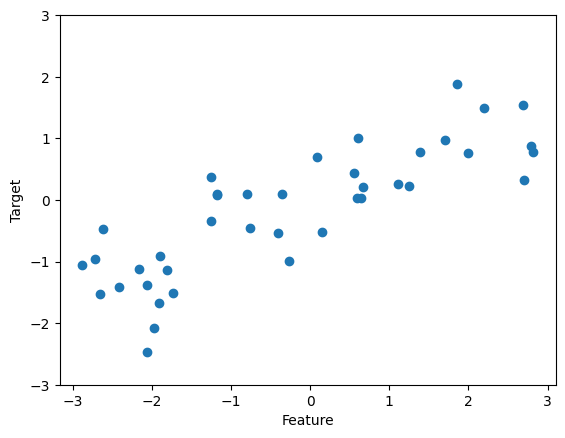

In [120]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

Breast cancer example: records measurements of breast tumors- each is either benign or malignant. Our task- predict whether a tumor is malignant based on measurements of tissue.

Let's load the data:

In [121]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Note: scikit-learn datasets are usually stored as Bunch objects. The thing that makes them different is that they don't only contain data, but they also have info about the data. To access values, you say "bunch.key" instead of bunch['key']

Let's figure out how many data points there are, and how many features each data point has:

In [122]:
print("Shape of cancer data:", cancer.data.shape)


Shape of cancer data: (569, 30)


Great, now we know that we have 569 data points with 30 features each.

Now let's find out how many of these are malignant vs benign:

In [123]:
print("Sample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


Let's figure out what each feature means:

In [124]:
print("Feature names:\n", cancer.feature_names)


Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


If you want to find out more about the data, you could read cancer.DESCR

Linear models: predict using a linear function of the input features

For regression, formula of a linear model looks like:

y = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

Here, x[0] all the way to x[p] denotes the features of a single data point. w and b are parameters of the model that are LEARNED, and y is the PREDICTION of the model. 

One way to think of it is to say it is a weighted sum of the features, and the weights are entries of w. Here is an example of what it could look like:I

w[0]: 0.393906  b: -0.031804


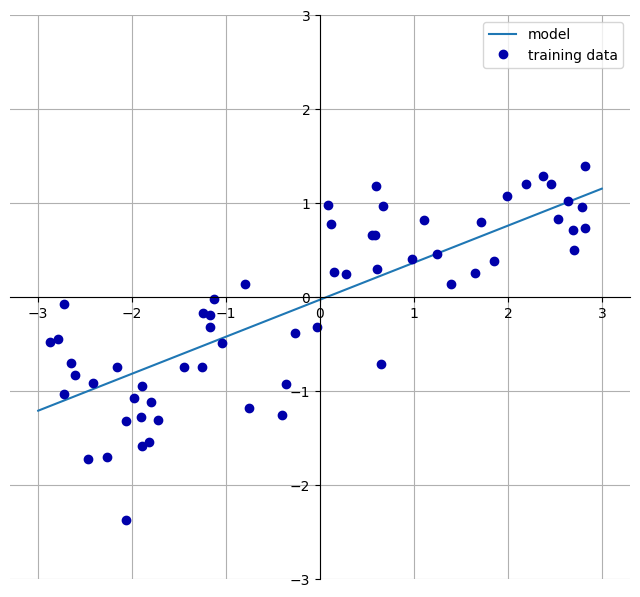

In [125]:
mglearn.plots.plot_linear_regression_wave()

If we have one feature, our linear model would be a LINE. If we had two features, it would be a PLANE. In higher dimensions, it would be a HYPERPLANE.

It may LOOK like we are losing details of data. But this isn't necessarily true in HIGHER dimensions. If you have more features than training data points, any target y can be PERFECTLY modeled on the training set as a linear function.

There are a few different LINEAR MODELS. They differ in their methods to find w and b, and how they control the COMPLEXITY of the model.

LINEAR REGRESSION: 

This method (also called OLS) finds w and b that MINIMIZE the mean squared error between predictions and true regression targets.

Pros: no parameters. Cons: no way to control model complexity.

To get the model in the image above, use this code: 

In [126]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

(w) is stored in the coef_ attribute (a NumPy array with one entry per input feature), while (b) is stored in the intercept_ attribute

In [127]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759704


Note: the underscore at the end of coef_ and intercept_ are to indicate that these values are derived from the TRAINING DATA, instead of parameters set by the USER.

Okay great. Now, what is the training set and test set performance?

In [128]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


Both of them are kind of bad. This means we are probably UNDERFITTING. This model is too simple. With more features though, the chance of OVERFITTING becomes much higher.

To avoid overfitting, we look for a model that allows us to control complexity. Introduce...

RIDGE REGRESSION:

Formula is the same as for ordinary least squares. BUT (w) is chosen so that it fits an additional CONSTRAINT. 

We constrain the model so that (w) are all close to zero as possible. This means each feature has as little effect as possible. 

This constraint is an example of REGULARIZATION: restricting a model to avoid overfitting. In ridge regression, it is called L2 regularization.

Unfortunately the housing dataset is no longer available. But this is how you use the model (in this case for our other example):

In [136]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In the housing example, we would get a Training set score of 0.89 and a Test set score of 0.75. This shows that we have WORSE performance on the TRAINING set, but better GENERALIZATION.

Ridge model has a TRADE-OFF between simplicity (near-zero coef) and performance on training set. To control how much this trade off is, the user can set the ALPHA parameter. Alpha corresponds to MODEL COMPLEXITY. (default is alpha=0).

INCREASING alpha forces coef to move toward zero. This decreases training set performance but can help generalization. (Ignore the numbers in this example lol)

In [137]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))


Training set score: 0.67
Test set score: 0.64


DECREASING alpha makes coef less restricted. For very SMALL alpha, our model approaches LINEAR REGRESSION.

Note that as you get more and more data, regularization becomes less important. As the data increases, ridge and linear regression will perform equally!

LASSO REGRESSION:

Similar to ridge regression, lasso restricts coeff to be close to zero, but in a different way, called L1 regularization.

With lasso, some coeff end up being EXACTLY ZERO.

This means some features are ignored! This can reveal the most IMPORTANT FEATURES of the model. 

(Ignore the results of the code, but this is how you would use lasso)

In [139]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.24
Number of features used: 1


Lasso also has a regularization parameter called ALPHA that controls how strongly coeff are pushed to zero.

If you notice the data is UNDERFITTED, then our model is probably COMPLEX, and we should then try DECREASING alpha. When you do this though, you must also INCREASE the default setting of max_iter (ignore the numbers it gives but this is how you would do it):

In [142]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.67
Test set score: 0.66
Number of features used: 1


If we set alpha too LOW, then we remove the effect of regularization, and we get a result similar to LINEAR REGRESSION.

In practice, RIDGE regression is usually the FIRST CHOICE. However if you have a lot of FEATURES, and only some of them are important, then Lasso might be better. It also offers a model that is easier to UNDERSTAND.

scikit-learn also provides the ElasticNet class, which combines the penalties of Lasso and Ridge. In practice, this combination works best, though at the price of having two parameters to adjust: one for the L1 regularization, and one for the L2 regularization.

LINEAR MODELS FOR CLASSIFICATION:

Let's start with binary classication:

y = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0

If the function is smaller than zero, we predict the class -1. If larger than zero, we predict +1.

The DECISION BOUNDARY is a linear function of the input. It can be a line, plane, or hyperplane, depending on the number of features.

There are many algorithms for learning linear models. They differ in two ways. First, in the way they measure how well a combo of coeff and intercepts fit the training data. Second, if and what kind of regularization they use.

It is NOT POSSIBLE to adjust w and b to minimize number of misclassifications. 

The two most common linear classication algorithms are LOGISTIC REGRESSION and LINEAR SUPPORT VECTOR MACHINES. 

Let's apply these two models to the forge dataset:

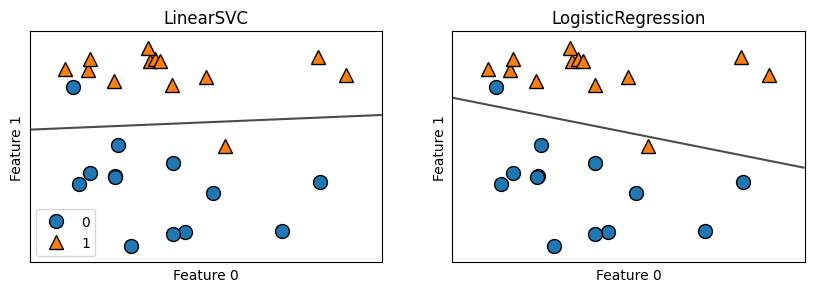

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

By default, both models apply an L2 regularization.

The TRADE-OFF PARAMETER that determines strength of regularization is called C.

HIGHER values of C correspond to LESS regularization. 

(Higher C means these models try to fit training set better, while low values mean they try to find (w) close to zero)

Another way to understand it: low values cause algorithms to try to match the MAJORITY of data points, while higher C tries to classify EACH data point correctly.

In practice:

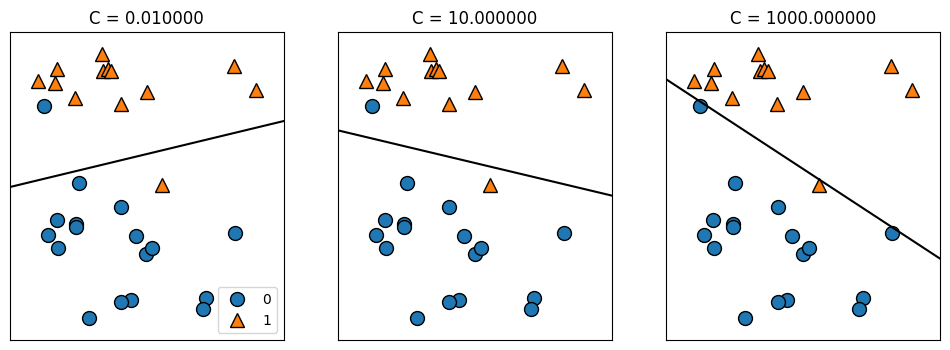

In [145]:
mglearn.plots.plot_linear_svc_regularization()


The model with C = 1000 is likely OVERFITTING. It doesn't capture the OVERALL layout of the classes very well.

In higher dimensions, we must be very careful to GUARD against OVERFITTING, because linear models become very POWERFUL.

Let's try LOGISTIC REGRESSION on the BREAST CANCER dataset.

In [156]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.946
Test set score: 0.958


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Increase C:

In [160]:
logreg100 = LogisticRegression(C=100, max_iter=500).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.974
Test set score: 0.972


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decrease C:

In [150]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Makes sense, this model was already underfit. This just made it more underfit.

Let's see the COEFFICIENTS learned by the three models:

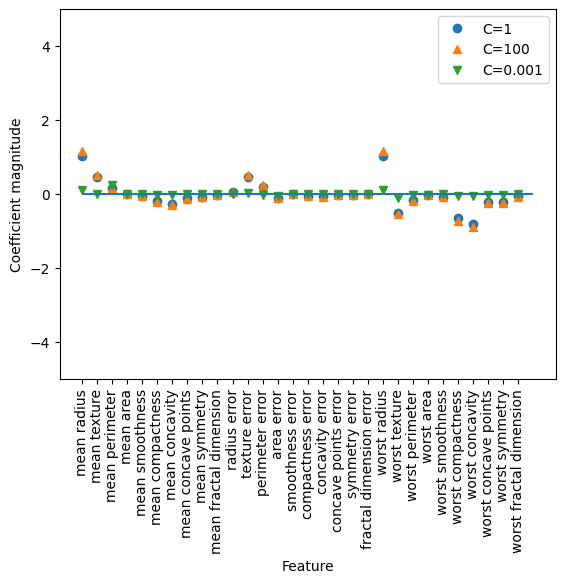

In [151]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

We could also do L1 regularization, which makes our model more INTERPRETABLE, since it LIMITS the model to only a few features.

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/

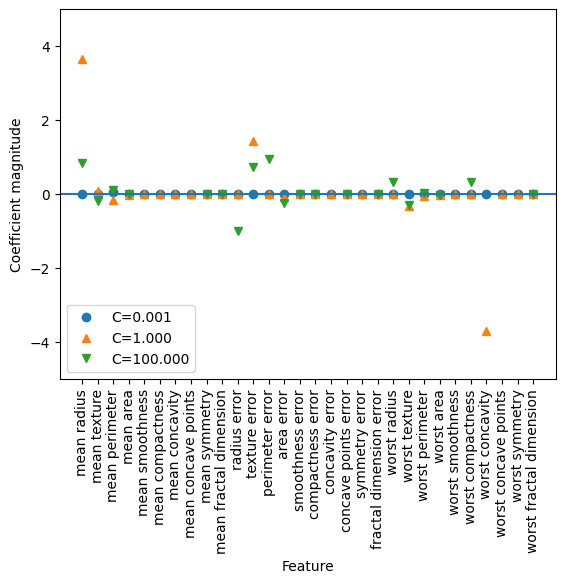

In [153]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

As you can see above, the PENALTY parameter is what influences regularization and whether the model will use all available features or select only a subset.